# Double pendulum

We are going to solve the double pendulum using symbolic calculus and we'll make and animation of the solution.

# 0. Import libraries

In [36]:
import sympy as smp
import scipy as sp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
plt.style.use("ggplot")

# 1. Variable definitions

### Generalized coordinates

In [9]:
t, R1, R2, g, m1, m2 = smp.symbols('t R_1 R_2 g m_1 m_2') 
theta1, theta2 = smp.symbols(r'\theta_1 \theta_2', cls = smp.Function)

theta1 = theta1(t)
theta2 = theta2(t)

### Pendulum positions

In [10]:
x1 = R1 * smp.sin(theta1)
y1 = - R1 * smp.cos(theta1) 

x2 = x1 + R2 * smp.sin(theta2) 
y2 = y1 - R2 * smp.cos(theta2) 

### First derivatives

In [11]:
dx1dt = smp.diff(x1, t)
dy1dt = smp.diff(y1, t)

dx2dt = smp.diff(x2, t)
dy2dt = smp.diff(y2, t)

dthe1dt = smp.diff(theta1, t)
dthe2dt = smp.diff(theta2, t)

### Kinetic energy

In [12]:
T1 = smp.Rational(1,2) * m1 * (dx1dt**2 + dy1dt**2)
T2 = smp.Rational(1,2) * m2 * (dx2dt**2 + dy2dt**2)
T = T1 + T2

### Potential energy

In [13]:
V1 = m1 * g * y1
V2 = m2 * g * y2
V = V1 + V2

### Lagrangian

In [14]:
L = T - V 

### And the Lagrange equations $\frac{dL}{dq} - \frac{d}{dt}\frac{dL}{d\dot{q}} = 0 $

In [15]:
LE1 = smp.diff(L, theta1) - smp.diff(smp.diff(L, dthe1dt), t) 
LE2 = smp.diff(L, theta2) - smp.diff(smp.diff(L, dthe2dt), t) 

# 2. Solution

### We solve the equations for $\frac{d^2\theta_{1}}{dt^2}$ and $\frac{d^2\theta_{2}}{dt^2}$ respectively

In [16]:
sols = smp.solve([LE1, LE2], [smp.diff(dthe1dt, t), smp.diff(dthe2dt, t)])

In [17]:
s1 = sols[smp.diff(dthe1dt, t)]
s1.simplify()

(R_1*m_2*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_1(t), t)**2 + 2*R_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + 2*g*m_1*sin(\theta_1(t)) + g*m_2*sin(\theta_1(t) - 2*\theta_2(t)) + g*m_2*sin(\theta_1(t)))/(R_1*(-2*m_1 + m_2*cos(2*\theta_1(t) - 2*\theta_2(t)) - m_2))

In [18]:
s2 = sols[smp.diff(dthe2dt, t)]
s2.simplify()

(-2*R_1*m_1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 - 2*R_1*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 - R_2*m_2*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_2(t), t)**2 - g*m_1*sin(2*\theta_1(t) - \theta_2(t)) + g*m_1*sin(\theta_2(t)) - g*m_2*sin(2*\theta_1(t) - \theta_2(t)) + g*m_2*sin(\theta_2(t)))/(R_2*(-2*m_1 + m_2*cos(2*\theta_1(t) - 2*\theta_2(t)) - m_2))

### We convert this second order system to a first order one numerically

In [19]:
domega1dt_n = smp.lambdify((t, g, R1, R2, m1, m2, theta1, theta2, dthe1dt, dthe2dt), s1)
domega2dt_n = smp.lambdify((t, g, R1, R2, m1, m2, theta1, theta2, dthe1dt, dthe2dt), s2)
omega1_n = smp.lambdify(dthe1dt, dthe1dt)
omega2_n = smp.lambdify(dthe2dt, dthe2dt)

### We solve the system of first order differential equations

In [20]:
def dSdt(S, t, g, R1, R2, m1, m2):
    theta1, omega1, theta2, omega2 = S
    return [omega1_n(omega1),
            domega1dt_n(t, g, R1, R2, m1, m2, theta1, theta2, omega1, omega2),
            omega2_n(omega2),
            domega2dt_n(t, g, R1, R2, m1, m2, theta1, theta2, omega1, omega2)
           ]

theta1_0 = 1
omega1_0 = -3
theta2_0 = -1
omega2_0 = 5

S_0 = (theta1_0, omega1_0, theta2_0, omega2_0)

In [21]:
t = np.linspace(0, 40, 1001)
R1 = 2
R2 = 1
m1 = 2
m2 = 1
g = 9.81

SF = odeint(dSdt, S_0, t = t, args = (g, R1, R2, m1, m2))

In [22]:
the1 = SF.T[0]
the2 = SF.T[2]

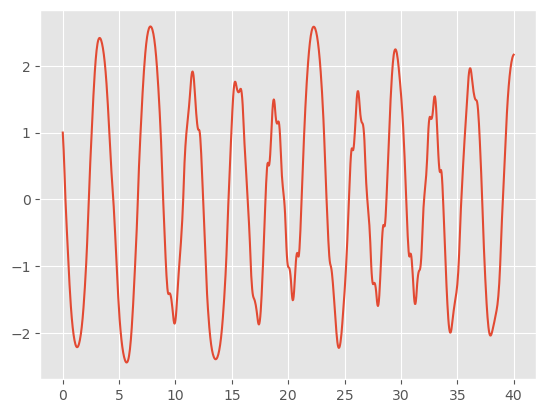

In [23]:
plt.plot(t, the1)

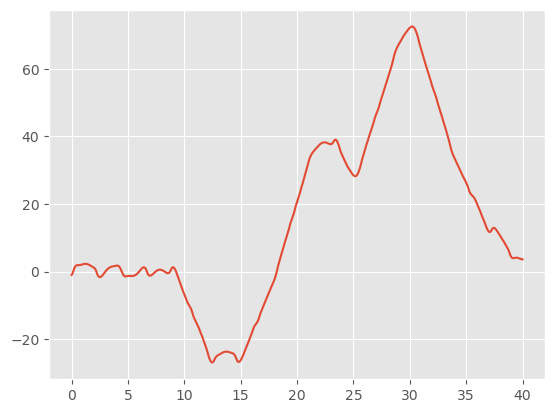

In [24]:
plt.plot(t, the2)

# 3. Animation

### We have solved the equations of the angles for each pendulum so we obtain the positions $(x_{1}, y_{1}, x_{2}, y_{2})$ to locate them in a plane.

In [37]:
def posicion(t, the1, the2, R1, R2):
    return[R1 * np.sin(the1),
           - R1 * np.cos(the1),
           R1 * np.sin(the1) + R2 * np.sin(the2),
           - R1 * np.cos(the1) - R2 * np.cos(the2)
          ]

x1, y1, x2, y2 = posicion(t, SF.T[0], SF.T[2], R1, R2)

### Finally we animate the positions

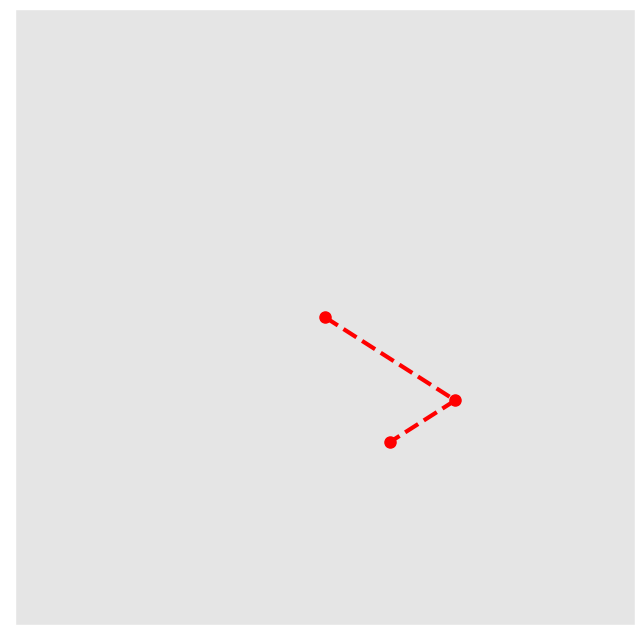

In [39]:
def animacion(i):
    ln1.set_data([0, x1[i], x2[i]],[0, y1[i], y2[i]])
  
fig, ax = plt.subplots(1, 1, figsize = (8,8))
ax.get_xaxis().set_ticks([]) #to hide the axes
ax.get_yaxis().set_ticks([]) #to hide the axes
ln1, = plt.plot([], [], 'ro--', lw = 3, markersize = 8)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ani = animation.FuncAnimation(fig, animacion, frames = 1000, interval = 50)
ani.save('pendulum.gif', writer = 'pillow', fps = 25) #When choosing t we take len(t<1)=25